In [1]:
import utz
from utz import *
from utz.plots import symbols
from benchmarks.cli.data_loader import DEFAULT_DB_PATH, METHODS, TBL

In [2]:
db_path = DEFAULT_DB_PATH  # SQL db path to read epoch stats from
tbl = TBL                  # SQL table name to read epoch stats from
out_dir = None             # Directory to save plot PNG/JSON to (e.g. "m3", "azl")
host = None                # Description of host the stats were collected on, used in plot subtitle (e.g. "M3 Mac", "Amazon Linux")
show = None                # Set to "png" to render plots in notebook as PNGs (good for noninteractive mode / Git-committing)
hostname = None            # Filter DB "hostname" field to values matching this regex
W = 1000                   # Output plot width
H =  600                   # Output plot height

In [3]:
# Parameters
out_dir = "m3"
show = "png"
hostname = "m3"
W = 1200
H = 800


In [4]:
db_uri = f'sqlite:///{db_path}'
df = pd.read_sql_table(tbl, db_uri)
if hostname:
    df = df[df.hostname.str.contains(hostname)].reset_index(drop=True).copy()
df

,start,epoch,n_rows,n_cols,elapsed,gc,max_mem,alb_start,sha,user,hostname,uri,method,batch_size,soma_chunk_size,shuffle_chunk_count,py_buffer_size,soma_buffer_size
0,2024-06-06 11:57:37.128034,0,132766,20000,7.370273,0.863471,6520995840,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824
1,2024-06-06 11:57:46.658026,1,132766,20000,7.263348,0.897326,6399639552,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824
2,2024-06-06 11:57:55.966235,2,132766,20000,7.157844,0.832213,7197687808,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824
3,2024-06-06 11:58:05.128729,3,132766,20000,7.530384,0.998360,6628802560,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824
4,2024-06-06 11:58:14.623299,4,132766,20000,7.355157,0.917738,7443185664,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2024-06-06 14:44:54.963902,0,132766,20000,14.195423,0.957329,4842536960,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824
131,2024-06-06 14:45:13.554434,1,132766,20000,14.187494,1.017186,4528930816,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824
132,2024-06-06 14:45:32.107602,2,132766,20000,14.139967,0.969758,4283777024,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824
133,2024-06-06 14:45:50.832099,3,132766,20000,15.094761,0.993705,4257366016,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824


In [5]:
df['total_chunk_size'] = df.soma_chunk_size * df.shuffle_chunk_count
[total_chunk_size] = df['total_chunk_size'].unique()
total_chunk_size

32768

In [6]:
# df.to_sql(tbl, db_uri, if_exists='replace', index=False)

In [7]:
chunks_log2 = df.soma_chunk_size.apply(log2).apply(int).unique().tolist()
chunks_log2.sort()
min_chunk_log2, max_chunk_log2 = min(chunks_log2), max(chunks_log2)
min_chunk_log2, max_chunk_log2, chunks_log2

(6, 14, [6, 7, 8, 9, 10, 11, 12, 13, 14])

In [8]:
counts_log2 = df.shuffle_chunk_count.apply(log2).apply(int).unique().tolist()
counts_log2.sort()
min_count_log2, max_count_log2 = min(counts_log2), max(counts_log2)
min_count_log2, max_count_log2, counts_log2

(1, 9, [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
chunk_count_to_size = (
    df
    [['soma_chunk_size', 'shuffle_chunk_count']]
    .value_counts()
    .sort_index()
    .index
    .to_frame()
    .reset_index(drop=True, level=0)
    .soma_chunk_size
    .to_dict()
)
chunk_count_to_size

{512: 64,
 256: 128,
 128: 256,
 64: 512,
 32: 1024,
 16: 2048,
 8: 4096,
 4: 8192,
 2: 16384}

In [10]:
C = 'SOMA chunk size'
N = 'Shuffled chunk count'
S = 'Samples / sec'
df[C] = pd.Categorical(df.soma_chunk_size.apply(lambda c: f'{c:,}'))
df[N] = pd.Categorical(df.shuffle_chunk_count.apply(lambda c: f'{c:,}'))
chunk_sizes = df[C].unique()
shuffle_chunk_counts = df[N].unique()
df[S] = df.n_rows / df.elapsed
M = 'Max. memory usage'
df = df.rename(columns={ 'max_mem': M, 'method': 'Method', })
df

,start,epoch,n_rows,n_cols,elapsed,gc,Max. memory usage,alb_start,sha,user,hostname,uri,Method,batch_size,soma_chunk_size,shuffle_chunk_count,py_buffer_size,soma_buffer_size,total_chunk_size,SOMA chunk size,Shuffled chunk count,Samples / sec
0,2024-06-06 11:57:37.128034,0,132766,20000,7.370273,0.863471,6520995840,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824,32768,64,512,18013.715673
1,2024-06-06 11:57:46.658026,1,132766,20000,7.263348,0.897326,6399639552,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824,32768,64,512,18278.898723
2,2024-06-06 11:57:55.966235,2,132766,20000,7.157844,0.832213,7197687808,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824,32768,64,512,18548.322479
3,2024-06-06 11:58:05.128729,3,132766,20000,7.530384,0.998360,6628802560,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824,32768,64,512,17630.707661
4,2024-06-06 11:58:14.623299,4,132766,20000,7.355157,0.917738,7443185664,2024-06-06 11:57:37.074605,453c0053010bd2ef316fc0371c5cb13c08e99361-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,np.array,1024,64,512,1073741824,1073741824,32768,64,512,18050.736038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2024-06-06 14:44:54.963902,0,132766,20000,14.195423,0.957329,4842536960,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824,32768,"16,384",2,9352.732836
131,2024-06-06 14:45:13.554434,1,132766,20000,14.187494,1.017186,4528930816,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824,32768,"16,384",2,9357.960036
132,2024-06-06 14:45:32.107602,2,132766,20000,14.139967,0.969758,4283777024,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824,32768,"16,384",2,9389.413733
133,2024-06-06 14:45:50.832099,3,132766,20000,15.094761,0.993705,4257366016,2024-06-06 14:44:54.960843,baf9a5b1f268ca857d767e6239d40487986be47a-dirty,ryan,ryan-tdb-m3.lan,data/census-benchmark_2:7,scipy.csr,1024,16384,2,1073741824,1073741824,32768,"16,384",2,8795.501885


In [11]:
[hostname] = df.hostname.unique()
print(f'{hostname=}')
[batch_size] = df.batch_size.unique()
print(f'{batch_size=}')
[n_vars] = df.n_cols.unique()
print(f'{n_vars=}')

hostname='ryan-tdb-m3.lan'
batch_size=1024
n_vars=20000


In [12]:
if host is None:
    if 'm3.lan' in hostname:
        host = 'M3 Mac'
    elif 'us-west-2' in hostname:
        host = 'Amazon Linux'
host_str = f"{host}, " if host else ""

In [13]:
host_subtitle = f'({host_str}{batch_size} samples per PyTorch batch)'

In [14]:
def plot(
    fig,
    *args,
    **kwargs,
):
    return utz.plot(
        fig,
        *args,        
        dir=out_dir,
        w=W, h=H,
        **kwargs,
    )

Wrote plot JSON to m3/speed_vs_chunks.png


Wrote plot image to m3/speed_vs_chunks.png


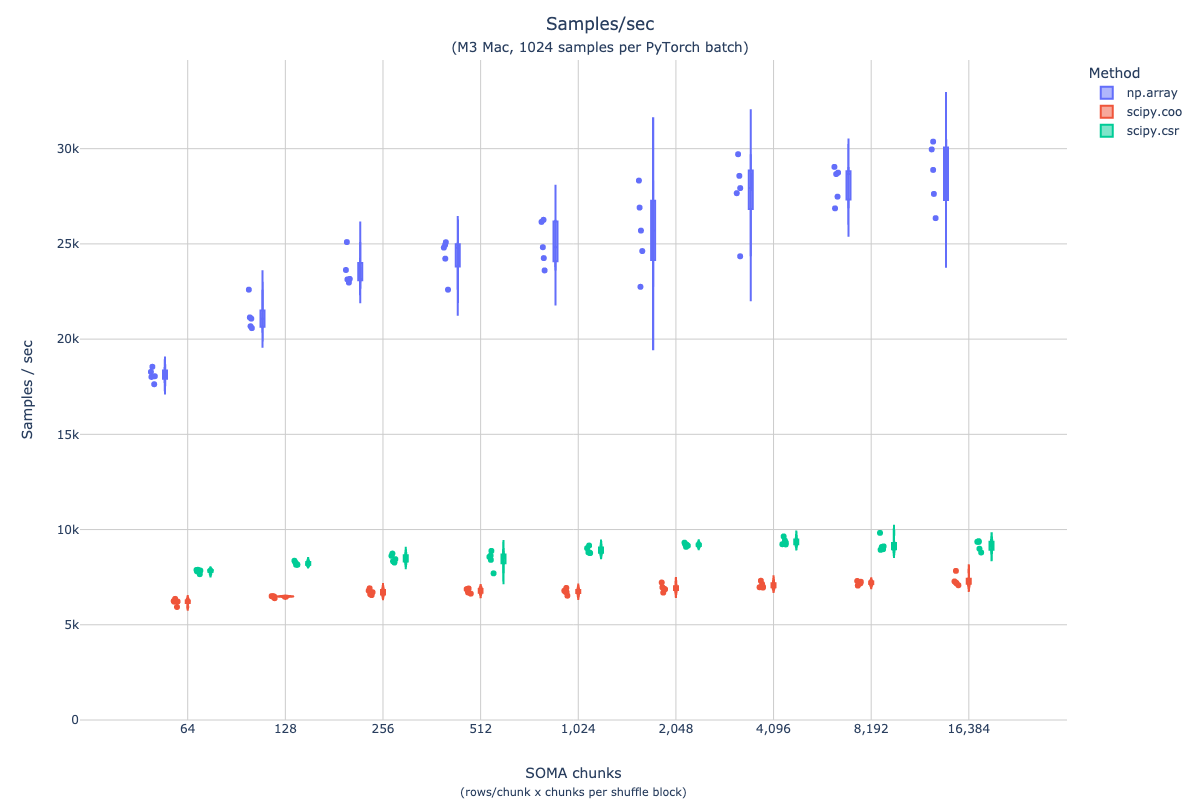

In [15]:
xtitle = ['SOMA chunks', '(rows/chunk x chunks per shuffle block)']
plot(
    px.violin(
        df, x=C, y=S,
        category_orders={ C: chunk_sizes, },
        color='Method',
        box=True,
        points='all',
    ),
    title=['Samples/sec', host_subtitle],
    xtitle=xtitle,
    ltitle='Method',
    xaxis_tickformat='%',
    name='speed_vs_chunks',
)

Wrote plot JSON to m3/mem_vs_chunks.png
Wrote plot image to m3/mem_vs_chunks.png


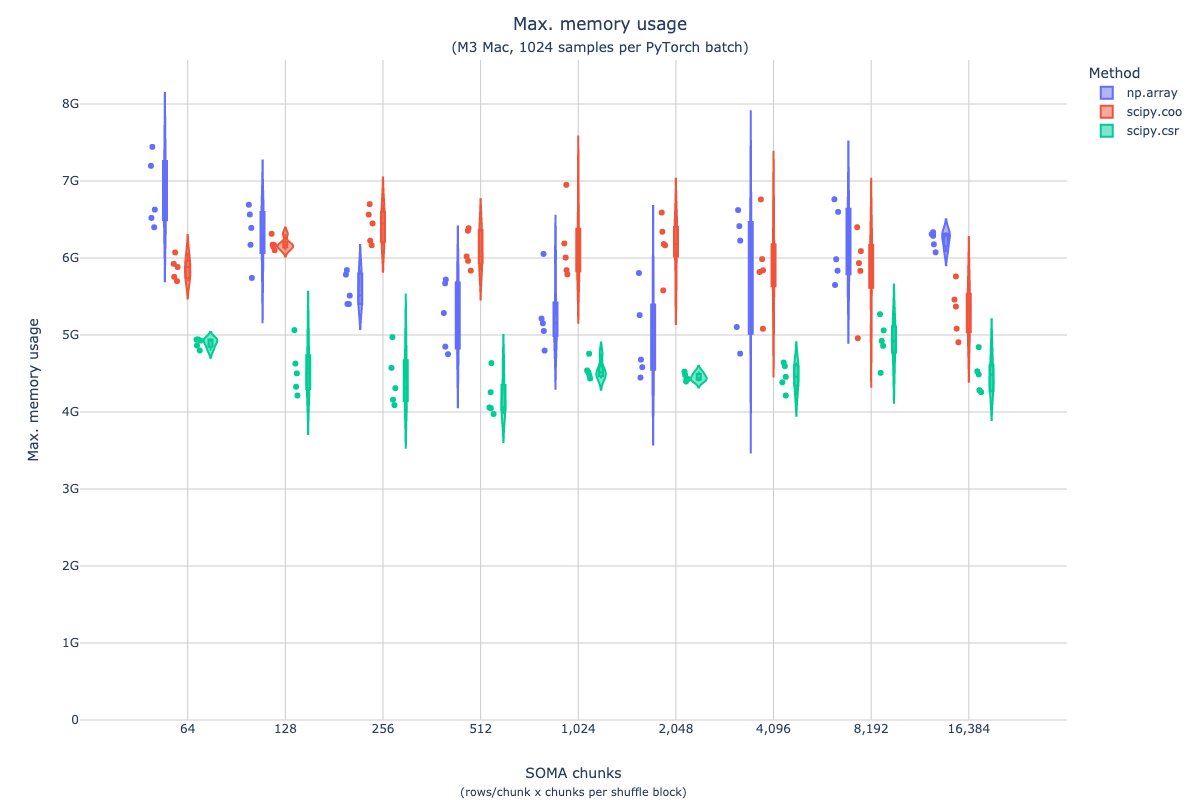

In [16]:
plot(
    px.violin(
        df, x=C, y=M,
        category_orders={ C: chunk_sizes, },
        color='Method',
        box=True,
        points='all',
    ),
    title=[M, host_subtitle],
    xtitle=xtitle,
    ltitle='Method',
    yaxis_tickformat='s',
    name="mem_vs_chunks",
)

In [17]:
chunk_count_to_size

{512: 64,
 256: 128,
 128: 256,
 64: 512,
 32: 1024,
 16: 2048,
 8: 4096,
 4: 8192,
 2: 16384}

In [18]:
title = "Samples/sec vs. memory use"

def ticktext(e):
    chunk_count = int(2**e)
    chunk_size = chunk_count_to_size[chunk_count]
    return f'{chunk_count:,} x {chunk_size:,}'

tickvals = list(reversed(counts_log2))
colorbar = dict(
    title=utz.plots.title(['SOMA chunks', '(shuffled chunks x rows/chunk)']),
    tickmode='array',
    tickvals=tickvals,
    ticktext=list(map(ticktext, tickvals)),
)

In [19]:
tickvals

[9, 8, 7, 6, 5, 4, 3, 2, 1]

Wrote plot JSON to m3/speed_vs_mem_1.png


Wrote plot image to m3/speed_vs_mem_1.png


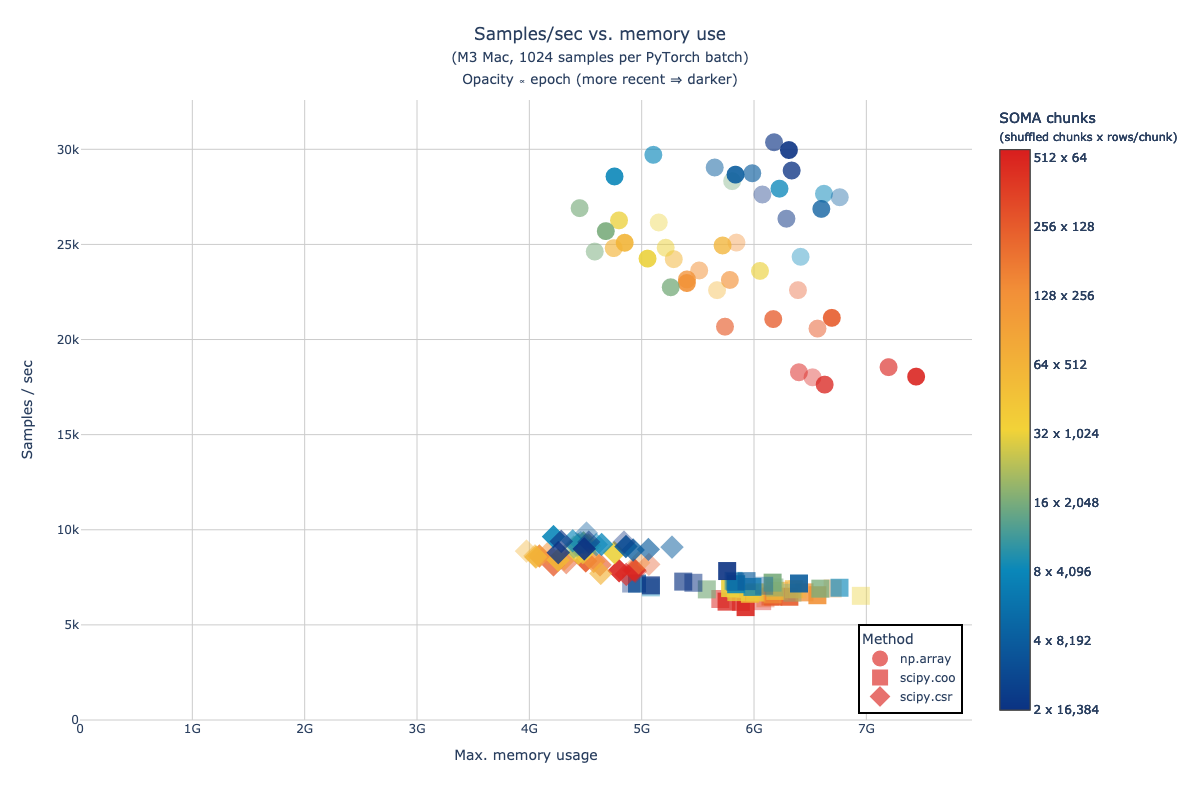

In [20]:
fig = go.Figure()
for idx, method in enumerate(METHODS):
    f = df[df.Method == method]
    fig.add_trace(go.Scatter(
        name=method,
        x=f[M],
        y=f[S],
        mode='markers',
        marker=dict(
            color=f.shuffle_chunk_count.apply(log2),
            colorscale=px.colors.diverging.Portland,
            cmin=min_count_log2,
            cmax=max_count_log2 + .12,
            colorbar=colorbar,
            showscale=True,
            opacity=0.4 + 0.5 * f.epoch / max(df.epoch),
            size=18,
            symbol=symbols[idx],
        ),
        customdata=f[['epoch', 'soma_chunk_size']],
    ))

plot(
    fig,
    [
        title,
        host_subtitle,
        'Opacity ∝ epoch (more recent ⇒ darker)',
    ],
    title_y=.95,
    name="speed_vs_mem_1",
    hovertemplate=[
        "Epoch: %{customdata[0]}",
        "Samples/sec: %{y:,d}",
        "Memory: %{x:.3s}",
        "%s: %%{customdata[1]}" % C,
    ],
    xtitle=M,
    xaxis_tickformat='s',
    xaxis_rangemode='tozero',
    ytitle=S,
    legend=dict(
        title_text='Method',
        xanchor='right', x=.99,
        yanchor='bottom', y=.01,
        bordercolor="Black",
        borderwidth=2,
    ),
    zerolines='y',
)